# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
cities_found=[]
cloudiness=[]
countries = []
date =[]
humidity=[]
lat=[]
lon=[]
max_temp=[]
wind_speed=[]
print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    print(f"Processing Record {city}")
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    response = requests.get(url).json()
    try:
        cities_found.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping...")
        pass
print("---------------------------")
print("Data Retrieval Complete")
df=pd.DataFrame({
    "City":cities_found,
    "Cloudiness": cloudiness,
    "Country":countries,
    "Date":date,
    "Humidity": humidity,
    "Lat":lat,
    "Lon":lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

Beginning Data Retrieval
---------------------------
Processing Record torbay
Processing Record east london
Processing Record yellowknife
Processing Record boyolangu
Processing Record rikitea
Processing Record ushuaia
Processing Record mataura
Processing Record butaritari
Processing Record floro
Processing Record punta arenas
Processing Record hobart
Processing Record cape town
Processing Record bredasdorp
Processing Record zhezkazgan
Processing Record albany
Processing Record urengoy
Processing Record busselton
Processing Record castro
Processing Record port alfred
Processing Record aporawan
City not found. Skipping...
Processing Record hilo
Processing Record lebu
Processing Record makarov
Processing Record kodiak
Processing Record chuy
Processing Record abu kamal
Processing Record bluff
Processing Record yumen
Processing Record dongsheng
Processing Record kavieng
Processing Record port blair
Processing Record voyvozh
Processing Record arraial do cabo
Processing Record saldanha
Proces

Processing Record naron
Processing Record havre-saint-pierre
Processing Record krasnoselkup
Processing Record katakwi
Processing Record safaga
Processing Record hamilton
Processing Record victoria
Processing Record oistins
Processing Record san ignacio
Processing Record solnechnyy
Processing Record ilhabela
Processing Record puerto baquerizo moreno
Processing Record vendome
Processing Record nusaybin
Processing Record svetlogorsk
Processing Record somerset east
Processing Record hithadhoo
Processing Record quelimane
Processing Record hami
Processing Record tawnat
City not found. Skipping...
Processing Record leh
Processing Record paamiut
Processing Record palmer
Processing Record hanmer springs
Processing Record naze
Processing Record deh rawud
City not found. Skipping...
Processing Record necochea
Processing Record sinnamary
Processing Record bull savanna
Processing Record acapulco
Processing Record acarau
Processing Record havoysund
Processing Record outlook
Processing Record komsomo

Processing Record tabas
Processing Record tianpeng
Processing Record hulan
Processing Record marcona
City not found. Skipping...
Processing Record turukhansk
Processing Record volchikha
Processing Record novobirilyussy
Processing Record rosarito
Processing Record khoni
Processing Record aksay
Processing Record berlevag
Processing Record sao miguel do araguaia
Processing Record antipovka
Processing Record sorong
Processing Record sept-iles
Processing Record fare
Processing Record shestakovo
Processing Record hobyo
Processing Record samaipata
Processing Record severodvinsk
Processing Record pitimbu
Processing Record paita
Processing Record bastia
Processing Record biak
Processing Record oyama
Processing Record do gonbadan
Processing Record roseburg
Processing Record scarborough
Processing Record itapuranga
Processing Record louisbourg
City not found. Skipping...
Processing Record mayya
Processing Record juifang
City not found. Skipping...
Processing Record plettenberg bay
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
df.to_csv(r"../output_data/weather_queries.csv", index=False)
df.describe()

,Cloudiness,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
count,575.000000,5.750000e+02,575.000000,575.000000,575.000000,575.000000,575.000000
mean,53.914783,1.584496e+09,73.132174,21.366400,22.262817,55.058000,8.660904
std,39.254792,8.614175e+01,20.330370,33.521894,89.636710,25.177802,5.874836
min,0.000000,1.584496e+09,8.000000,-54.800000,-179.170000,-28.860000,0.380000
25%,16.500000,1.584496e+09,64.000000,-6.475000,-53.785000,36.930000,4.425000
50%,63.000000,1.584496e+09,77.000000,25.690000,25.590000,60.800000,7.000000
75%,92.000000,1.584496e+09,88.000000,50.285000,101.310000,76.110000,11.510000
max,100.000000,1.584496e+09,100.000000,78.220000,179.320000,95.000000,29.970000


In [12]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Torbay,90,CA,1584495883,79,47.67,-52.73,28.99,24.16
1,East London,0,ZA,1584495857,76,-33.02,27.91,69.21,4.52
2,Yellowknife,75,CA,1584495627,64,62.46,-114.35,-0.99,5.82
3,Boyolangu,9,ID,1584495883,70,-8.12,111.89,85.86,0.40
4,Rikitea,74,PF,1584495884,80,-23.12,-134.97,80.40,11.81


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

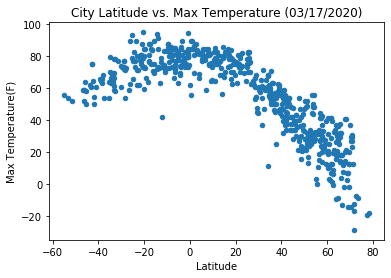

In [23]:
fig, ax = plt.subplots()
df.plot.scatter(x="Lat",y="Max Temp", ax=ax)
ax.set_title("City Latitude vs. Max Temperature (03/17/2020)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature(F)")
fig.savefig("../output_data/temp_vs_lat.png")

Based on the plot above, the earth's temperature peaks around equator and decreases roughly linearly as the absolute value of lantitude increases in both directions, north and south. The rate of declining is slower in southern hemisphere. This makes sense because of the obliquity of the earth and the angle of the sunlight hitting earth is more normal on the southern hemisphere. In another word, it is because the southern hemisphere is right now in summer.

#### Latitude vs. Humidity Plot

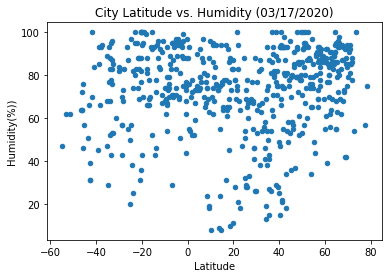

In [24]:
fig, ax = plt.subplots()
df.plot.scatter(x="Lat",y="Humidity", ax=ax)
ax.set_title("City Latitude vs. Humidity (03/17/2020)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%))")
fig.savefig("../output_data/humidity_vs_lat.png")

#### Latitude vs. Cloudiness Plot

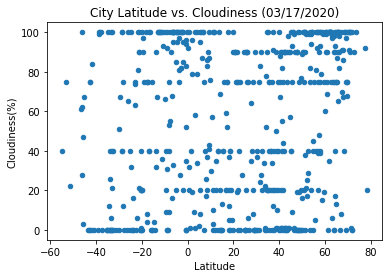

In [26]:
fig, ax = plt.subplots()
df.plot.scatter(x="Lat",y="Cloudiness", ax=ax)
ax.set_title("City Latitude vs. Cloudiness (03/17/2020)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness(%)")
fig.savefig("../output_data/cloudiness_vs_lat.png")

#### Latitude vs. Wind Speed Plot

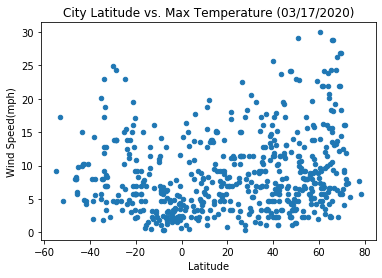

In [27]:
fig, ax = plt.subplots()
df.plot.scatter(x="Lat",y="Wind Speed", ax=ax)
ax.set_title("City Latitude vs. Max Temperature (03/17/2020)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed(mph)")
fig.savefig("../output_data/WindSpeed_vs_lat.png")

## Linear Regression

In [47]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_plot (x_values, y_values,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()),fontsize=15,color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()
    return 


In [40]:
# Create Northern and Southern Hemisphere DataFrames
condition =df["Lat"]>0
condition_1=df["Lat"]<0
df_northern_hemisphere= df[condition]
df_southern_hemisphere= df[condition_1]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.12x +91.44
The r-squared is: -0.8908654868828121


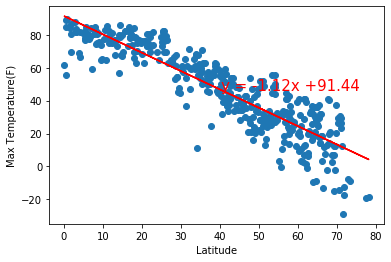

In [48]:
regression_plot(df_northern_hemisphere["Lat"],df_northern_hemisphere["Max Temp"],"Latitude","Max Temperature(F)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.44x +82.51
The r-squared is: 0.6036598524292212


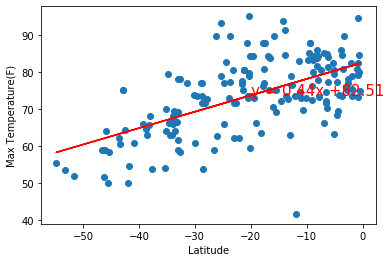

In [49]:
regression_plot(df_southern_hemisphere["Lat"],df_southern_hemisphere["Max Temp"],"Latitude","Max Temperature(F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.28x +60.97
The r-squared is: 0.26742423819476574


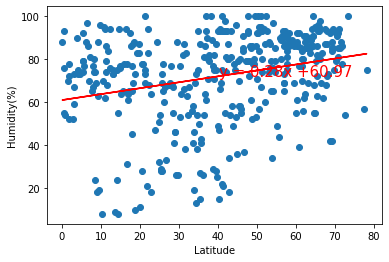

In [50]:
regression_plot(df_northern_hemisphere["Lat"],df_northern_hemisphere["Humidity"],"Latitude","Humidity(%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.4x +83.42
The r-squared is: 0.29218744630253196


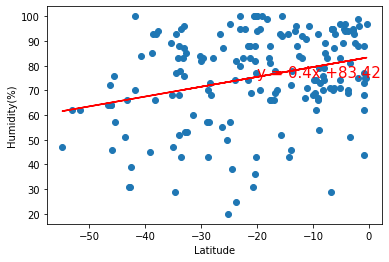

In [51]:
regression_plot(df_southern_hemisphere["Lat"],df_southern_hemisphere["Humidity"],"Latitude","Humidity(%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.5x +34.58
The r-squared is: 0.2621528264613895


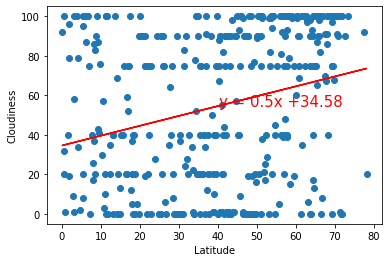

In [52]:
regression_plot(df_northern_hemisphere["Lat"],df_northern_hemisphere["Cloudiness"],"Latitude","Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.88x +69.91
The r-squared is: 0.29752288409120603


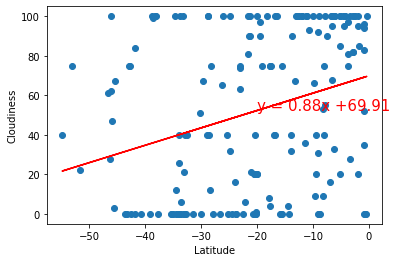

In [53]:
regression_plot(df_southern_hemisphere["Lat"],df_southern_hemisphere["Cloudiness"],"Latitude","Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.07x +6.6
The r-squared is: 0.22461747996329362


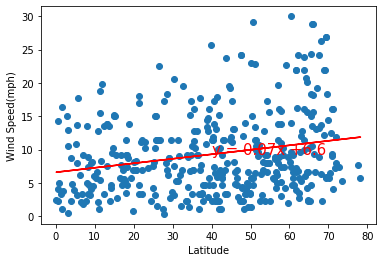

In [55]:
regression_plot(df_northern_hemisphere["Lat"],df_northern_hemisphere["Wind Speed"],"Latitude","Wind Speed(mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


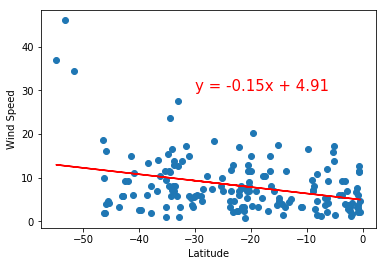

In [116]:
regression_plot(df_southern_hemisphere["Lat"],df_southern_hemisphere["Wind Speed"],"Latitude","Wind Speed(mph)")